In [6]:
# Import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## 1. EDA Dataset Reviews ##

In [7]:
# Carga de base de datos de reviews
df_reviews= pd.read_parquet(r'C:\Users\Lenovo\Desktop\Proyecto Individual\Datasets\Analisis_Sentimient\Reviews_sent_analysis.parquet')


In [8]:
#Revisamos nuestra base de datos para saber si hay algo más que ajustar en nuestra columna review

In [9]:
df_reviews.head()

,user_id,posted,item_id,recommend,review,sentiment_analysis
9304,bow47,Posted March 27.,730,True,lol,2
43660,ErrorT3rm1n4l,"Posted April 5, 2014.",223630,True,airbuccan gioco fantastico ammetto che ci ho g...,2
44614,76561198007161112,"Posted August 30, 2014.",730,True,either die noob live long enough call hacker p...,2
25292,76561198030021498,"Posted August 6, 2014.",293740,True,made demon rabbit eat everyth poop gold,2
29152,76561198074920496,"Posted June 24, 2015.",233250,True,rekt normal aimad friend get itplz halp meit e...,2
46326,76561198041083847,"Posted August 15, 2015.",387860,True,shrimplici im sorri littl friend,2
1612,cripla66,"Posted June 20, 2014.",9930,True,bloodi awesom game drift race crashin n bashin,2
49456,stopbeingfat,"Posted November 27, 2014.",730,True,fun game,2
29975,bangs8,"Posted July 20, 2013.",219890,True,think man game,2
26710,76561198063161083,"Posted January 29, 2015.",211820,True,look one amaz game must say honestli way cheap...,2


In [10]:
# se realiza una copia antes de iniciar 
df_reviews_copy= df_reviews.copy()


In [11]:
# Revisamos muestras de datos para familiarizarse con los datos y entender su estructura
df_reviews_copy.sample(20)

,user_id,posted,item_id,recommend,review,sentiment_analysis
30635,76561198071324590,"Posted May 19, 2015.",252490,False,amaz game wont work unless super comput,0
57534,TheJewsDidNineEleven,"Posted February 27, 2015.",346120,True,tcp error simul,2
25735,737911,"Posted March 28, 2015.",440,True,great cartoonish element funni game mani colle...,2
7510,micropie,"Posted April 3, 2014.",550,True,bos game play,2
530,76561198007584361,"Posted September 10, 2015.",401650,True,love draw bow second enemi empti clip reload e...,2
15269,anonymoosebrony,"Posted May 29, 2015.",253980,False,bucket doesnt work arent run origin intend har...,0
44487,jasonmus,Posted April 30.,348460,False,there australian server understand suppos firs...,2
18471,76561198043562907,"Posted June 25, 2014.",218230,True,great get work,2
41896,Sn3akYb3akY,Posted January 22.,65790,True,great game would play agian thth mission soo h...,2
1106,bobseagull,"Posted May 2, 2014.",242720,False,name jfiamudeh taken best name maker simul ive...,2


*Buscamos posibles duplicados*

In [12]:
# Contar el número de filas duplicadas
conteo_duplicados = df_reviews_copy.duplicated().sum()

# Mostrar el resultado
print(f"Cantidad de filas duplicadas en df_items_copy: {conteo_duplicados}")

Cantidad de filas duplicadas en df_items_copy: 0


**Realizamos un análisis general**

In [13]:
df_reviews_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58401 entries, 0 to 58400
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             58401 non-null  object
 1   posted              58401 non-null  object
 2   item_id             58401 non-null  int64 
 3   recommend           58401 non-null  bool  
 4   review              57511 non-null  object
 5   sentiment_analysis  58401 non-null  int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 2.3+ MB


In [14]:
# Revisamos las estadísticas generales del dataset, para todas las variables incluyendo no numéricas

df_reviews_copy.describe(include= 'all')

,user_id,posted,item_id,recommend,review,sentiment_analysis
count,58401,58401,58401.000000,58401,57511,58401.000000
unique,25447,1906,NaN,2,50630,NaN
top,Lickidactyl,"Posted June 21, 2014.",NaN,True,,NaN
freq,10,220,NaN,51665,816,NaN
mean,NaN,NaN,169732.044571,NaN,NaN,1.704132
std,NaN,NaN,132017.352475,NaN,NaN,0.685924
min,NaN,NaN,10.000000,NaN,NaN,0.000000
25%,NaN,NaN,8930.000000,NaN,NaN,2.000000
50%,NaN,NaN,218230.000000,NaN,NaN,2.000000
75%,NaN,NaN,261640.000000,NaN,NaN,2.000000


*Identificamos los valores únicos del dataframe*

In [15]:
def valores_unicos(data):
  total = data.count()
  tt = pd.DataFrame(total)
  tt.columns = ['Total']
  unicos = []
  for col in data.columns:
    unicos.append(data[col].nunique())
  tt['Valores únicos'] = unicos
  return np.transpose(tt)
valores_unicos(df_reviews_copy)

,user_id,posted,item_id,recommend,review,sentiment_analysis
Total,58401,58401,58401,58401,57511,58401
Valores únicos,25447,1906,3682,2,50630,3


*Verificamos los valores más frecuentes para identificar algunos patrones*

In [16]:
def valores_frecuentes(data):
  total = data.count()
  tt = pd.DataFrame(total)
  tt.columns = ['Total']
  items = []
  vals = []
  for col in data.columns:
    item = data[col].value_counts().index[0]
    val = data[col].value_counts().values[0]
    items.append(item)
    vals.append(val)
  tt['Valores más frecuentes'] = items
  tt['Frecuencia'] = vals
  tt['Porcentaje'] = np.round(vals/total*100, 3)
  return np.transpose(tt)
valores_frecuentes(df_reviews_copy)

,user_id,posted,item_id,recommend,review,sentiment_analysis
Total,58401,58401,58401,58401,57511,58401
Valores más frecuentes,Lickidactyl,"Posted June 21, 2014.",730,True,,2
Frecuencia,10,220,3704,51665,816,48777
Porcentaje,0.017,0.377,6.342,88.466,1.419,83.521


In [17]:
df_reviews_copy.isnull().sum()

user_id                 0
posted                  0
item_id                 0
recommend               0
review                890
sentiment_analysis      0
dtype: int64

**Resumen de Hallazgos**:  
- *Usuarios únicos son 25.447, el total de items únicos es de 3682*  
- *51.665 recomendaciones son positivas ('True'), que corresponden a un 89,8% respecto del total de recomendaciones.*
- *El análisis de sentimiento muestra que un 83,5% de los reviews son postivos respecto del juego.
- *Sólo la columna review posee nulos, con 890 casos, columna que eliminaremos porque ya no es necesaria.*  
- *La única columna que necesitamos transformar al formato correcto datetime es la columna 'posted'.*  


*Eliminamos columna 'review'*

In [18]:
df_reviews_copy.drop(columns=['review'], inplace=True)

In [19]:
#Revisamos y chequeamos la correcta eliminación
df_reviews_copy

,user_id,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,"Posted November 5, 2011.",1250,True,2
1,76561197970982479,"Posted July 15, 2011.",22200,True,2
2,76561197970982479,"Posted April 21, 2011.",43110,True,2
3,js41637,"Posted June 24, 2014.",251610,True,2
4,js41637,"Posted September 8, 2013.",227300,True,2
...,...,...,...,...,...
58396,76561198312638244,Posted July 10.,70,True,2
58397,76561198312638244,Posted July 8.,362890,True,2
58398,LydiaMorley,Posted July 3.,273110,True,2
58399,LydiaMorley,Posted July 20.,730,True,2


*Ajuste del tipo de dato de la columna 'Posted'*

*'Posted' no está en formato correcto de fecha, hacemos un tratamiento para extraer fecha válida.*

In [20]:
# Se extrae solo la parte de la fecha sin "Posted" y los puntos, usando expresiones regulares
df_reviews_copy["posted"] = df_reviews_copy["posted"].str.extract(r'Posted (.+?)\.')

# Convertir a formato datetime con formato "%B %d, %Y", las que no tengas años quedarán con formato 'Not a Time'
df_reviews_copy["posted"] = pd.to_datetime(df_reviews_copy["posted"], errors='coerce', format="%B %d, %Y")

df_reviews_copy

,user_id,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,2011-11-05,1250,True,2
1,76561197970982479,2011-07-15,22200,True,2
2,76561197970982479,2011-04-21,43110,True,2
3,js41637,2014-06-24,251610,True,2
4,js41637,2013-09-08,227300,True,2
...,...,...,...,...,...
58396,76561198312638244,NaT,70,True,2
58397,76561198312638244,NaT,362890,True,2
58398,LydiaMorley,NaT,273110,True,2
58399,LydiaMorley,NaT,730,True,2


*Al hacer la transformaciones, las fechas sin año se pierden. Eliminamos estas columnas para graficar algunas relaciones.*

In [21]:

# Número de filas antes de eliminar los valores nulos
filas_antes = len(df_reviews_copy)

# Eliminar valores nulos en la columna 'posted'
df_reviews_copy.dropna(subset=['posted'], inplace=True)

# Número de filas después de eliminar los valores nulos
filas_despues = len(df_reviews_copy)

# Calcular la cantidad de filas eliminadas
filas_eliminadas = filas_antes - filas_despues

print('filas eliminadas del dataframe:', filas_eliminadas)



filas eliminadas del dataframe: 9930


*Para graficar, extraemos año y mes de 'posted'*

In [22]:
# Extraemos el año en una nueva columna
df_reviews_copy['year']= df_reviews_copy['posted'].dt.year
df_reviews_copy['month']= df_reviews_copy['posted'].dt.month
print(df_reviews_copy)

                 user_id     posted  item_id  recommend  sentiment_analysis  \
0      76561197970982479 2011-11-05     1250       True                   2   
1      76561197970982479 2011-07-15    22200       True                   2   
2      76561197970982479 2011-04-21    43110       True                   2   
3                js41637 2014-06-24   251610       True                   2   
4                js41637 2013-09-08   227300       True                   2   
...                  ...        ...      ...        ...                 ...   
58348            wayfeng 2015-10-14      730       True                   2   
58351  76561198251004808 2015-10-10   253980       True                   2   
58361        72947282842 2015-10-31      730       True                   1   
58363          ApxLGhost 2015-12-14      730       True                   2   
58372  76561198267374962 2015-12-29   369200       True                   2   

       year  month  
0      2011     11  
1      20

*Finalmente, graficamos la relación cantidad de reviews por Año y Mes*

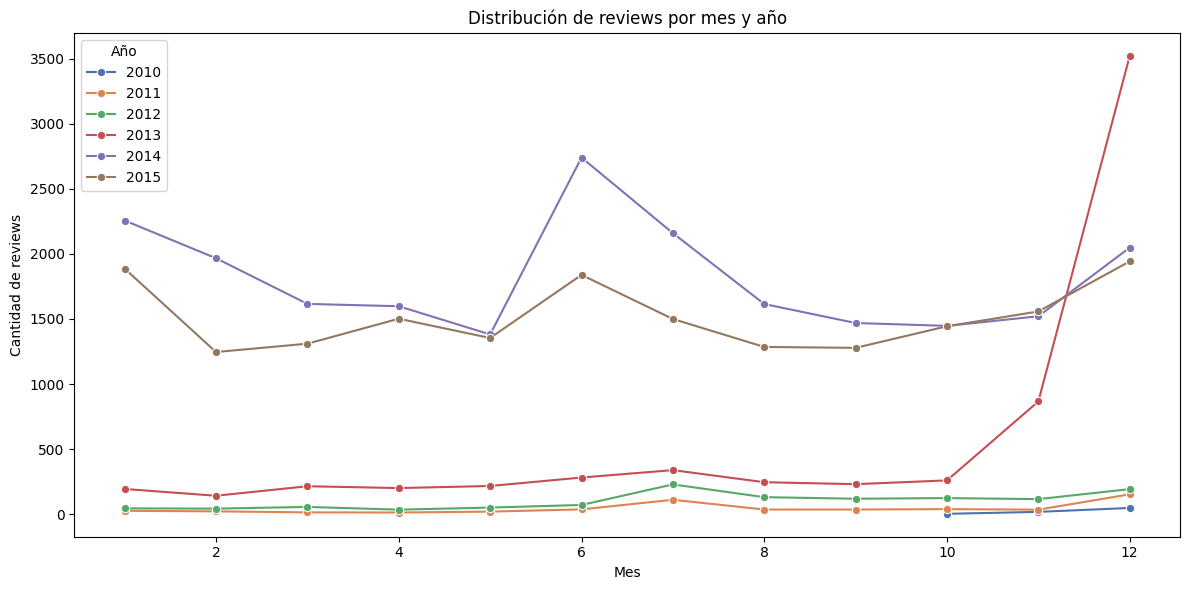

In [23]:
# Calcular la cantidad de reviews por mes y año
filtro_reviews = df_reviews_copy.groupby(['year', 'month']).size().reset_index(name='Cantidad de reviews')

# Graficar la distribución de reviews por mes y año
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtro_reviews, x="month", y="Cantidad de reviews", hue="year", marker='o',palette='deep')
plt.xlabel('Mes')
plt.ylabel('Cantidad de reviews')
plt.title('Distribución de reviews por mes y año')
plt.legend(title='Año')
plt.tight_layout()
plt.show()

*Hay una gran cantidad de reseñas concentradas en diciembre de 2013, revisamos ese año en particular*

In [24]:
df_counts = df_reviews_copy.groupby(['year']).size().reset_index(name='Cantidad de reviews')
df_counts

,year,Cantidad de reviews
0,2010,66
1,2011,530
2,2012,1201
3,2013,6707
4,2014,21821
5,2015,18146


In [25]:
# Filtrar las reseñas publicadas en diciembre de 2015
df_2013 = df_reviews_copy[(df_reviews_copy['year'] == 2013)]

# Contar los usuarios únicos y la cantidad de reseñas
usuarios_unicos = df_2013['user_id'].nunique()
cantidad_reviews = df_2013.shape[0]

print(f"Cantidad de reseñas en 2013: {cantidad_reviews}")
print(f"Usuarios únicos en 2013: {usuarios_unicos}")

print(f'Top 10 de item_id con más reseñas en diciembre de 2013:')
top_10_items = df_2013['item_id'].value_counts().head(10)
print(top_10_items)

Cantidad de reseñas en 2013: 6707
Usuarios únicos en 2013: 4921
Top 10 de item_id con más reseñas en diciembre de 2013:
item_id
440       801
4000      342
570       259
550       237
730       182
105600    149
72850     134
211820    102
230410    100
218620     96
Name: count, dtype: int64


In [26]:
df_reviews_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48471 entries, 0 to 58372
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             48471 non-null  object        
 1   posted              48471 non-null  datetime64[ns]
 2   item_id             48471 non-null  int64         
 3   recommend           48471 non-null  bool          
 4   sentiment_analysis  48471 non-null  int64         
 5   year                48471 non-null  int32         
 6   month               48471 non-null  int32         
dtypes: bool(1), datetime64[ns](1), int32(2), int64(2), object(1)
memory usage: 2.3+ MB


*Guardamos una copia de este dataset limpio*

In [27]:
df_reviews_copy.to_parquet(r"reviews_final.parquet", index=False)

## 1. EDA Dataset Items ##

In [41]:
# Carga de base de datos de items
df_items= pd.read_parquet(r'C:\Users\Lenovo\Desktop\Proyecto Individual\Datasets\0. Data\Items.parquet')

*Se realiza copia antes de iniciar para no afectar el dataframe original*

In [42]:
df_items_copy= df_items.copy()

*Se identifica si hay filas duplicadas*

In [43]:
# Contar el número de filas duplicadas
conteo_duplicados = df_items_copy.duplicated().sum()

# Mostrar el resultado
print(f"Cantidad de filas duplicadas en df_items_copy:  {conteo_duplicados}")

Cantidad de filas duplicadas en df_items_copy:  13


In [44]:
# Se eliminan los duplicados
df_items_copy.drop_duplicates(inplace=True)

**Revisión general df_items_copy**

In [45]:
df_items_copy.sample(10)

,user_id,items_count,item_id,item_name,playtime_forever
1109537,nealsavage,615,1930,Two Worlds Epic Edition,0.0
4066066,Resplendentbadger,704,239070,Hammerwatch,45.0
4000233,76561198017218804,14,232090,Killing Floor,427.0
3041668,76561198074506980,92,33220,Tom Clancys Splinter Cell Conviction,137.0
93212,76561198081438874,81,550,Left Dead,8087.0
1105669,Jakobey,64,368730,No Time To Explain Remastered,0.0
1765763,76561198053471515,155,202170,Sleeping Dogs,561.0
3738800,76561198058546299,217,305620,The Long Dark,115.0
4635630,76561198067128005,27,271290,HAWKEN,477.0
1804326,76561198042867998,111,272860,Next Car Game ThrowASanta Sneak Peek,4.0


In [46]:
df_items_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5094092 entries, 0 to 5094104
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   item_id           int64  
 3   item_name         object 
 4   playtime_forever  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 233.2+ MB


In [47]:
def valores_unicos(data):
  total = data.count()
  tt = pd.DataFrame(total)
  tt.columns = ['Total']
  unicos = []
  for col in data.columns:
    unicos.append(data[col].nunique())
  tt['Valores únicos'] = unicos
  return np.transpose(tt)
valores_unicos(df_items_copy)

,user_id,items_count,item_id,item_name,playtime_forever
Total,5094092,5094092,5094092,5094092,5094092
Valores únicos,70912,924,10978,10731,48861


* Existen 70.912 user_id únicos en el dataframe. Se listan además 10978 item_id pero sólo tenemos nombres asociados a estos items para 10.731 de ellos.

In [48]:
def valores_frecuentes(data):
  total = data.count()
  tt = pd.DataFrame(total)
  tt.columns = ['Total']
  items = []
  vals = []
  for col in data.columns:
    item = data[col].value_counts().index[0]
    val = data[col].value_counts().values[0]
    items.append(item)
    vals.append(val)
  tt['Valores más frecuentes'] = items
  tt['Frecuencia'] = vals
  tt['Porcentaje'] = np.round(vals/total*100, 3)
  return np.transpose(tt)
valores_frecuentes(df_items_copy)

,user_id,items_count,item_id,item_name,playtime_forever
Total,5094092,5094092,5094092,5094092,5094092
Valores más frecuentes,phrostb,51,205790,Dota Test,0.0
Frecuencia,7762,24990,49136,49136,1847730
Porcentaje,0.152,0.491,0.965,0.965,36.272


*Dota Test es el item más listado, que corresponde al item_id 205790. 'phrostb' es el usuario que posee más ítems asociados, con un total de 7762.*   
*Existen 1847730 registros de items en donde los usuarios a los que están asociados no registran horas de juego, que en porcentaje corresponde al 36,3% de los registros respecto del total de registros.*

In [49]:
def valores_faltantes(data):
    # Contar valores nulos y vacíos
    total_nulos = data.isnull().sum()
    total_vacios = (data == '').sum()

    # Sumar ambos tipos de valores faltantes
    total = total_nulos + total_vacios

    # Calcular el porcentaje de valores faltantes
    porcentaje_nulos = (total_nulos / len(data)) * 100
    porcentaje_vacios = (total_vacios / len(data)) * 100

    # Crear DataFrame con el resumen de valores faltantes
    tt = pd.concat([total_nulos, porcentaje_nulos, total_vacios, porcentaje_vacios], axis=1, keys=['Total Nulos', 'Porcentaje Nulos', 'Total Vacios', 'Porcentaje Vacios'])

    # Identificar los tipos de datos de las columnas
    tt['Tipos'] = [str(data[col].dtype) for col in data.columns]

    return np.transpose(tt)

valores_faltantes(df_items_copy)

,user_id,items_count,item_id,item_name,playtime_forever
Total Nulos,0,0,0,0,0
Porcentaje Nulos,0.0,0.0,0.0,0.0,0.0
Total Vacios,0,0,0,1090,0
Porcentaje Vacios,0.0,0.0,0.0,0.021397,0.0
Tipos,object,int64,int64,object,float64


* Se identifican 1090 valores vacíos en la columna item_name. Los eliminamos.

In [50]:
df_items_copy.replace({'item_name': ''}, np.nan, inplace=True)
df_items_copy.dropna(inplace=True)

In [51]:
# Verificamos los cambios
valores_faltantes(df_items_copy)

,user_id,items_count,item_id,item_name,playtime_forever
Total Nulos,0,0,0,0,0
Porcentaje Nulos,0.0,0.0,0.0,0.0,0.0
Total Vacios,0,0,0,0,0
Porcentaje Vacios,0.0,0.0,0.0,0.0,0.0
Tipos,object,int64,int64,object,float64


*Obtenemos algunos fltros de información para revisar y graficar*

In [52]:
# Este filtro solo toma las dos primeras columnas user_id e items_count para poder revisar la cantidad de items asociadas por usuario. Graficamos:
total_items_user = df_items_copy[['user_id','items_count']].drop_duplicates()
total_items_user

,user_id,items_count
0,76561197970982479,277
277,js41637,888
1165,evcentric,137
1302,Riot-Punch,328
1630,doctr,541
...,...,...
5093574,76561198320136420,321
5093895,ArkPlays7,4
5093899,76561198323066619,22
5093921,76561198326700687,177


*Revisamos las estadísticas asociadas a total_items_user*

In [53]:
total_items_user.describe()

,items_count
count,70912.000000
mean,71.836671
std,132.366763
min,1.000000
25%,14.000000
50%,40.000000
75%,87.000000
max,7762.000000


*De un total de 70.912 usuarios (user_id), existe uno con 7762 ítems asociados (antes ya habíamos descubiero que era el usuario 'phrostb').*  
*Por otro lado, la media de items por usuario es 71,8, con una desviación estándar de 132 items por usuario, afectada por los outliers.*

*Graficamos los items*

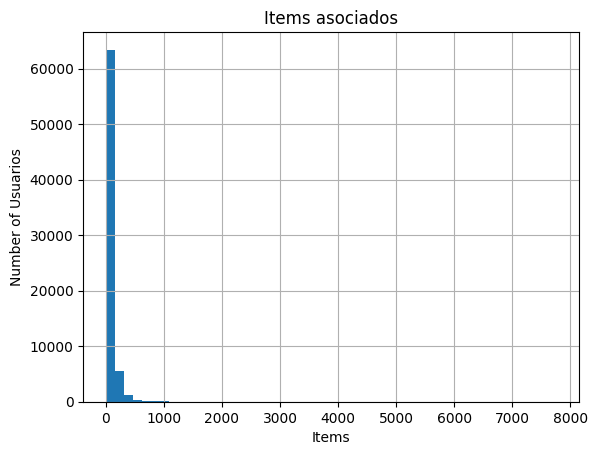

In [54]:
# Plot histogram of release date feat
total_items_user['items_count'].hist(bins=50)
plt.title('Items asociados')
plt.ylabel('Number of Usuarios')
plt.xlabel('Items')
plt.show()

*Observamos la frecuencia de usuarios con hasta 1000 items asociados*

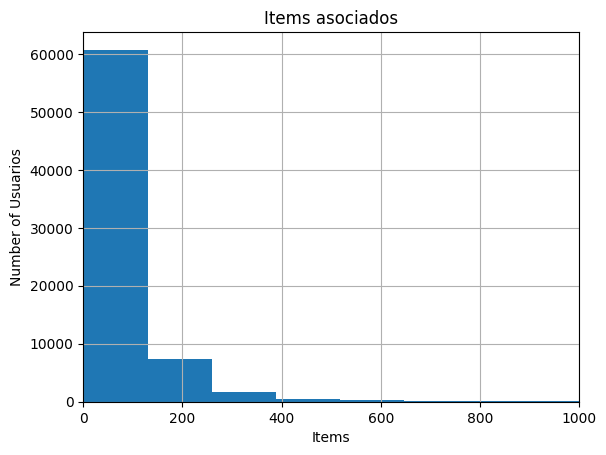

In [55]:
# Plot histogram of release date feat
total_items_user['items_count'].hist(bins=60)
plt.title('Items asociados')
plt.ylabel('Number of Usuarios')
plt.xlabel('Items')
plt.xlim(0,1000)
plt.show()

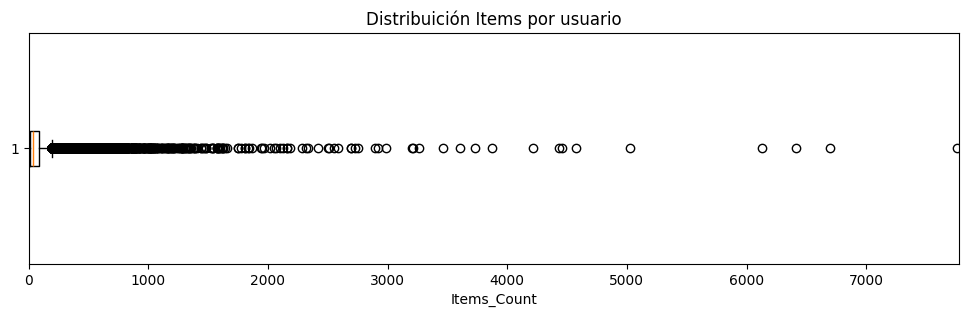

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))  # Aumenta el ancho
plt.boxplot(total_items_user['items_count'], vert=False, )
plt.xlim(0, total_items_user['items_count'].max() + 10)
plt.xlabel('Items_Count')
plt.title('Distribuición Items por usuario')

plt.show()

*Calculamos los valores extremos en la columna items_count, aplicando el rango intercuantílico (IQR)*

In [57]:
def calcula_outliers_IQR(data, carac, distancia):
  IQR = data[carac].quantile(0.75) - data[carac].quantile(0.25)
  limite_inf = data[carac].quantile(0.25) - (IQR*distancia)
  limite_sup = data[carac].quantile(0.75) + (IQR*distancia)
  outliers = (data[carac] > limite_sup) | (data[carac] < limite_inf)
  return outliers
outliers = calcula_outliers_IQR(total_items_user, 'items_count', 1.5)
# Listamos los valores de total_items_user
total_items_user.loc[outliers,'items_count']

0          277
277        888
1302       328
1630       541
2171       371
          ... 
5078920    202
5080276    347
5088974    310
5090547    291
5093574    321
Name: items_count, Length: 4957, dtype: int64

*Graficamos los items por usuario nuevamente excluyendo los valores extremos y visualizamos la distribución de datos nuevamente*

<Axes: xlabel='items_count'>

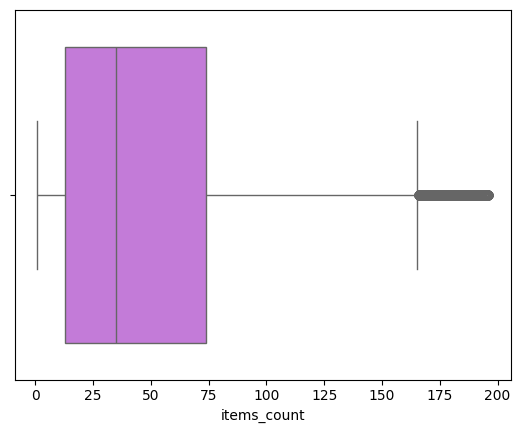

In [58]:
outliers = calcula_outliers_IQR(total_items_user, 'items_count', 1.5)
data_trimmed_std = total_items_user.loc[~outliers]
sns.boxplot(data_trimmed_std['items_count'], orient='h', color='#CC6CE7')

*Como vemos, ya nuestro conjunto de datos es más representativo de la cantidad de datos que poseemos en nuestro dataset. La media al estar afectada antes por los valores extremos, se situa ahora por debajo de 50 items por usuario.*

*Obstenemos los 10 juegos más reseñados.*

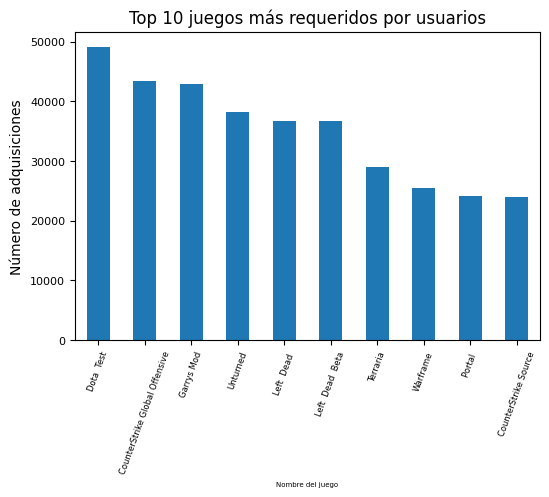

In [59]:
top_games = df_items_copy['item_name'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
top_games.plot(kind='bar')
plt.title('Top 10 juegos más requeridos por usuarios')
plt.xlabel('Nombre del juego', fontsize=5)
plt.ylabel('Número de adquisiciones')
plt.xticks(rotation=70, fontsize=6)
plt.yticks(fontsize=8)

plt.show()

*Graficamos ahora la cantidad de horas jugadas por usuario. La columna 'playtime_forever' está en minutos, por tanto la pasamos a horas.*

In [60]:
df_items_copy['playtime_hours'] = df_items_copy['playtime_forever'] / 60

playtime_user= df_items_copy[['user_id', 'playtime_hours']].groupby('user_id').sum()


*Revisamos algunas estadísticas, el usuario con más horas jugadas posee 77.673 horas jugadas! :o*

In [41]:
playtime_user.describe()

,playtime_hours
count,70912.000000
mean,1185.923266
std,1474.586024
min,0.000000
25%,191.550000
50%,736.166667
75%,1684.604167
max,77673.216667


In [61]:

df_ordenado = playtime_user.sort_values(by='playtime_hours', ascending=False)
df_ordenado.head(10)

,playtime_hours
user_id,
REBAS_AS_F-T,77618.850000
shinomegami,53986.850000
Sp3ctre,47047.666667
DownSyndromeKid,46506.983333
Terminally-Chill,28844.600000
stopgovtcorruption,28626.816667
Steamified,28214.750000
Cow666,27913.416667
PiozZ,26172.750000


*Graficamos las horas jugadas por usuario*

<Figure size 600x400 with 0 Axes>

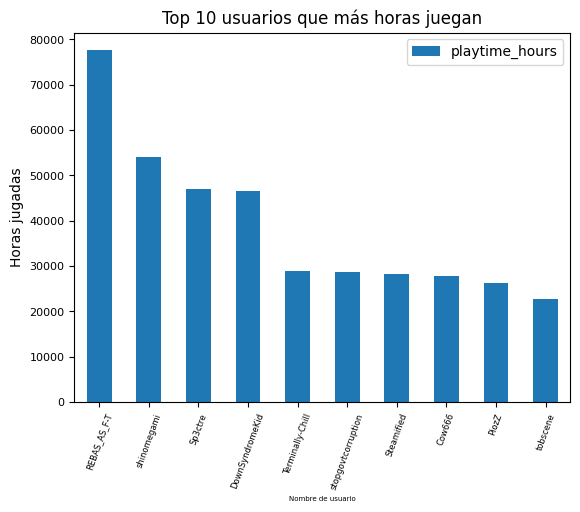

In [62]:
top_players = df_ordenado.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
top_players.plot(kind='bar')
plt.title('Top 10 usuarios que más horas juegan')
plt.xlabel('Nombre de usuario', fontsize=5)
plt.ylabel('Horas jugadas')
plt.xticks(rotation=70, fontsize=6)
plt.yticks(fontsize=8)

plt.show()

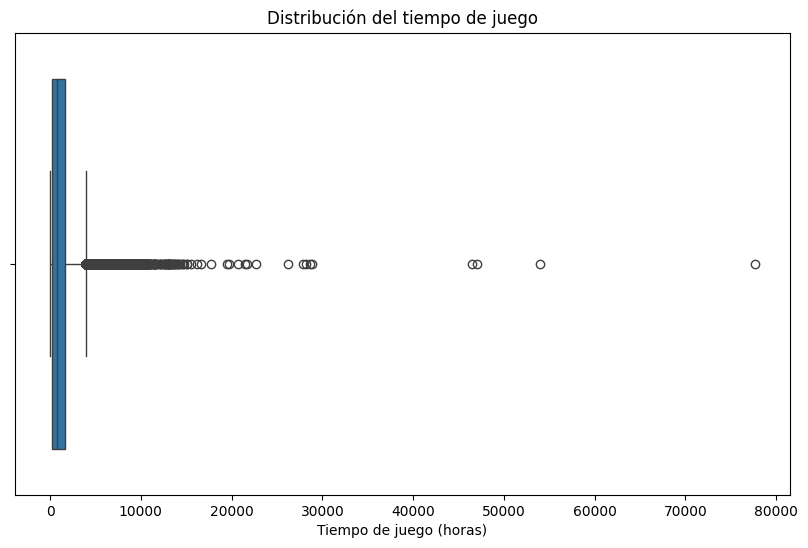

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='playtime_hours', data=playtime_user)
plt.title('Distribución del tiempo de juego')
plt.xlabel('Tiempo de juego (horas)')
plt.show()

*Calculamos los valores extremos de horas de juego con método IQR*

In [64]:
def calcula_outliers_IQR(data, carac, distancia):
  IQR = data[carac].quantile(0.75) - data[carac].quantile(0.25)
  limite_inf = data[carac].quantile(0.25) - (IQR*distancia)
  limite_sup = data[carac].quantile(0.75) + (IQR*distancia)
  outliers = (data[carac] > limite_sup) | (data[carac] < limite_inf)
  return outliers
outliers = calcula_outliers_IQR(playtime_user, 'playtime_hours', 1.5)
# Listamos los valores de total_items_user
playtime_user.loc[outliers,'playtime_hours'].count()

3367

In [46]:
Porcentaje_outliers=(playtime_user.loc[outliers,'playtime_hours'].count()/playtime_user.value_counts().sum())*100
Porcentaje_outliers

4.746728339350181

*Existen 3366 valores extremos, que representan un 4.74% del total de user_id: Graficamos un boxplot nuevamente, sin valores extremos*

<Axes: xlabel='playtime_hours'>

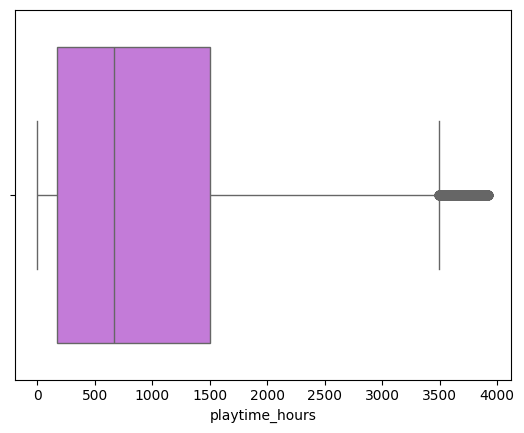

In [65]:
outliers = calcula_outliers_IQR(playtime_user, 'playtime_hours', 1.5)
data_trimmed_std = playtime_user.loc[~outliers]
sns.boxplot(data_trimmed_std['playtime_hours'], orient='h', color='#CC6CE7')

*Como se aprecia, ajustamos datos para que sean más representativos del conjunto de datos, y que la media no se vea tan afectada. Esto será importante tenerlo en cuenta al momento de entrenar nuestro modelo de Machine Learning, posteriormente.*

In [66]:
filtro_items_count= df_items_copy['items_count'].drop_duplicates()
filtro_items_count

0           277
277         888
1165        137
1302        328
1630        541
           ... 
4883869     693
4982010    1081
5055944     787
5056789    3603
5068555    1173
Name: items_count, Length: 924, dtype: int64

## 1. EDA Dataset Games ##

# Carga de datos

In [69]:
df_games= pd.read_parquet(r'C:\Users\Lenovo\Desktop\Proyecto Individual\Datasets\0. Data\Steam_games.parquet')

*Hacemos una copia para resguardar el dataframe original*

In [70]:
df_games_copy = df_games.copy()

# Análisis general del dataset

In [71]:
df_games_copy.sample(10)

,publisher,genres,app_name,release_date,tags,price,id,developer
1544,K Games,Casual Strategy,Sid Meiers Ace Patrol,2013,Strategy Casual TurnBased TurnBased Strategy W...,4.99,244070.0,Firaxis Games
23777,Vostok Games,Action Massively RPG,Survarium Steam Starter Pack,2016,Action RPG Massively Multiplayer Free to Play,0.00,456800.0,Vostok Games
14210,SCS Software,Indie Simulation,American Truck Simulator New Mexico,2017,Simulation Indie Open World America Driving,11.99,684630.0,SCS Software
7988,Tripwire Interactive,Action,Killing Floor,2016,Zombies Coop Gore FPS Survival Action Horror M...,29.99,232090.0,Tripwire Interactive
27251,None,Action,DWE DW Original Costume Pack,2015,Action,17.99,349937.0,KOEI TECMO GAMES CO LTD
30264,Binary Fortress Software,Utilities,DisplayFusion,2013,Utilities,29.99,227260.0,Binary Fortress Software
5146,Dovetail Games,Simulation,TS Marketplace Renewable Energy Pack,2016,Simulation,4.99,326025.0,Skyhook Games
28389,Warner Bros Interactive Entertainment Feral In...,Action Adventure,LEGO The Hobbit The Battle Pack,2014,Action Adventure LEGO,1.99,292712.0,Travellers TalesFeral Interactive Mac
6671,PlayWay SA,Indie Racing Simulation,Car Mechanic Simulator Maserati,2016,Indie Simulation Racing,5.99,434901.0,Red Dot Games
1467,Two Tribes,Adventure Casual Indie,Toki Tori,2013,Puzzle Indie Casual Adventure Platformer Metro...,14.99,201420.0,Two Tribes


In [72]:
df_games_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24035 non-null  object 
 1   genres        31968 non-null  object 
 2   app_name      32109 non-null  object 
 3   release_date  29967 non-null  object 
 4   tags          31972 non-null  object 
 5   price         30962 non-null  float64
 6   id            32133 non-null  float64
 7   developer     28784 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.0+ MB


In [73]:
df_games_copy.describe()

,price,id
count,30962.000000,3.213300e+04
mean,8.037472,4.517574e+05
std,13.760780,1.827140e+05
min,0.000000,1.000000e+01
25%,1.990000,3.292800e+05
50%,4.990000,4.520600e+05
75%,9.990000,5.934000e+05
max,995.000000,2.028850e+06


In [74]:
valores_unicos(df_games_copy)

,publisher,genres,app_name,release_date,tags,price,id,developer
Total,24035,31968,32109,29967,31972,30962,32133,28784
Valores únicos,8159,2640,31246,44,15395,130,32132,10899


In [75]:
valores_frecuentes(df_games_copy)

,publisher,genres,app_name,release_date,tags,price,id,developer
Total,24035,31968,32109,29967,31972,30962,32133,28784
Valores más frecuentes,Ubisoft,Action,Fantasy Grounds Darkwoulfes Token Pack Volume,2017,Casual Simulation,4.99,612880.0,Ubisoft San Francisco
Frecuencia,385,1883,13,9595,1292,4191,2,1260
Porcentaje,1.602,5.89,0.04,32.019,4.041,13.536,0.006,4.377


In [76]:
valores_faltantes(df_games_copy)

,publisher,genres,app_name,release_date,tags,price,id,developer
Total Nulos,8100,167,26,2168,163,1173,2,3351
Porcentaje Nulos,25.206162,0.519683,0.080909,6.746538,0.507235,3.650226,0.006224,10.427882
Total Vacios,0,0,0,0,0,0,0,0
Porcentaje Vacios,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tipos,object,object,object,object,object,float64,float64,object


*Existen 32.135 filas en nuestro dataframe y 8 columnas. Esta base de datos lista el nombre del juego (app_name), indicando su género(genre), publisher, price, tags asociados al juego  y su desarrollador(developer).*  

*Ubisoft es el publisher más frecuente de la base de datos, hay 385 juegos asociados a Ubisoft. Ubisoft San Francisco es el desarrollador con más juegos en la base de datos, con un total de 1260 juegos desarrollados.*  

*un 32% de los juegos fueron lanzados en el año 2017. Existe un app_name que se repite 13 veces, por tanto necesitamos eliminar duplicados que al parecer la base de datos tiene.*  

*El promedio de precios de un juego ronda los 8 dólares, y el juego más caro cuesta 995 dólares. El 75% de los juegos no supera los 10 dólares, por tanto ya podemos advertir que tenemos valores extremos que desvirtuan la media.*  

*Tenemos bastantes valores nulos en nuestro dataframe. En el caso de publisher, esta columna posee un 25% de valores nulos, y developer, posee un 10%.*

Se necesita realizar ajuste de datos luego de todas las modificaciones, además, la columna genre debe contener un sólo género representativo del juego.

In [77]:
# Se eliminan los duplicados
df_games_copy.drop_duplicates(inplace=True)

**Tratamiento nulos**

*Dado que los nulos son muchos, en el caso de publisher, corresponden al 25% de todos los datos, se busca una base de datos de steam que se descarga de Kaggle para completar los valores faltantes que sean necesarios.*



**Actualización base de datos**  

*Se comienza cargando base de datos externa de Steam, ya filtrada con las columnas que necesitamos, encontrada en https://www.kaggle.com/datasets/fronkongames/steam-games-dataset.*

In [78]:
ext_bd= pd.read_parquet(r'C:\Users\Lenovo\Desktop\Proyecto Individual\Datasets\0. Data\ext_bdgames.parquet')

*Se realiza copia para no afectar el DF original*

In [79]:
ext_bd_copy=ext_bd.copy()

In [80]:
ext_bd_copy.head()

,name,release_date,developer,publisher,genre,original_price
0,DOOM,"May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks",Action,$19.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Action,Adventure,Massively Multiplayer",$29.99
2,BATTLETECH,"Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Action,Adventure,Strategy",$39.99
3,DayZ,"Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Action,Adventure,Massively Multiplayer",$44.99
4,EVE Online,"May 6, 2003",CCP,"CCP,CCP","Action,Free to Play,Massively Multiplayer,RPG,...",Free


*Sólo se deja año en la columna release_date de la nueva base de datos*

In [81]:
ext_bd_copy['release_date'] = ext_bd_copy['release_date'].str.extract(r'(\d{4})')

In [82]:

ext_bd_copy['publisher'] = ext_bd_copy['publisher'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else pd.NA)

In [83]:
# Se elimina $ del original_precio
ext_bd_copy['original_price'] = ext_bd_copy['original_price'].apply(lambda x: x.replace('$', '') if isinstance(x, str) else x)

In [84]:
# Convertimos los datos de la columna 'tags' a cadenas para luego usar la función clean_text
ext_bd_copy[['publisher', 'name', 'developer']] = ext_bd_copy[['publisher', 'name', 'developer']].astype(str)

In [85]:
# Limpiamos los textos de ext_bd_copy. Creamos función para convertir listas a cadenas y limpiar el texto
def clean_text(text):
    '''Elimina caracteres especiales de un texto'''
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text
# Aplicar la función a las columnas especificadas
#['genres', 'tags', 'specs', 'publisher', 'app_name', 'developer']
columns_to_clean = ['publisher', 'name', 'developer']
for column in columns_to_clean:
    ext_bd_copy[column] = ext_bd_copy[column].apply(clean_text)

In [86]:
ext_bd_copy.head()

,name,release_date,developer,publisher,genre,original_price
0,DOOM,2016,id Software,Bethesda Softworks,Action,19.99
1,PLAYERUNKNOWNS BATTLEGROUNDS,2017,PUBG Corporation,PUBG Corporation,"Action,Adventure,Massively Multiplayer",29.99
2,BATTLETECH,2018,Harebrained Schemes,Paradox Interactive,"Action,Adventure,Strategy",39.99
3,DayZ,2018,Bohemia Interactive,Bohemia Interactive,"Action,Adventure,Massively Multiplayer",44.99
4,EVE Online,2003,CCP,CCP,"Action,Free to Play,Massively Multiplayer,RPG,...",Free


*Finalmente se copian los datos de ext_bd_copy al dataframe df_games_copy*

In [87]:
# Se hace un merge temporal  para las columnas  'name', 'developer', 'publisher', 'genre','release_date', 'original_price'
merge_temp = df_games_copy.merge(
    ext_bd_copy[['name', 'developer', 'publisher', 'genre','release_date', 'original_price']],
    left_on='app_name',
    right_on='name',
    how='left',
    suffixes=('', '_right')  
)

# Se rellenan los valores faltantes (left join)
df_games_copy['publisher'] = df_games_copy['publisher'].combine_first(merge_temp['publisher_right'])
df_games_copy['developer'] = df_games_copy['developer'].combine_first(merge_temp['developer_right'])
df_games_copy['genres'] = df_games_copy['genres'].combine_first(merge_temp['genre'])
df_games_copy['release_date'] = df_games_copy['release_date'].combine_first(merge_temp['release_date_right'])
df_games_copy['price'] = df_games_copy['price'].combine_first(merge_temp['original_price'])


*Revisamos los nulos nuevamente después de la actualización del dataframe df_games_copy*

In [88]:
print(merge_temp[['publisher_right', 'developer_right']].notna().sum())

publisher_right    22539
developer_right    22539
dtype: int64


In [89]:
valores_faltantes(df_games_copy)

,publisher,genres,app_name,release_date,tags,price,id,developer
Total Nulos,2823,76,26,788,163,429,2,1179
Porcentaje Nulos,8.785087,0.23651,0.080911,2.452231,0.507251,1.335035,0.006224,3.669011
Total Vacios,27,0,0,0,0,0,0,13
Porcentaje Vacios,0.084023,0.0,0.0,0.0,0.0,0.0,0.0,0.040456
Tipos,object,object,object,object,object,object,float64,object


*Con la estrategia anterior, rebajamos 5277 nulos en columna publihser, 2133 en columna developer, 748 en columna price, 99 en columna genre y 1401 nulos en columna release_data.*  


**Ajuste tipos de datos**

In [90]:
df_games_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32134 entries, 0 to 32134
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     29311 non-null  object 
 1   genres        32058 non-null  object 
 2   app_name      32108 non-null  object 
 3   release_date  31346 non-null  object 
 4   tags          31971 non-null  object 
 5   price         31705 non-null  object 
 6   id            32132 non-null  float64
 7   developer     30955 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.2+ MB


In [91]:
valores_faltantes(df_games_copy)

,publisher,genres,app_name,release_date,tags,price,id,developer
Total Nulos,2823,76,26,788,163,429,2,1179
Porcentaje Nulos,8.785087,0.23651,0.080911,2.452231,0.507251,1.335035,0.006224,3.669011
Total Vacios,27,0,0,0,0,0,0,13
Porcentaje Vacios,0.084023,0.0,0.0,0.0,0.0,0.0,0.0,0.040456
Tipos,object,object,object,object,object,object,float64,object


In [92]:
df_games_copy.replace('', np.nan, inplace=True)
df_games_copy.replace('None', np.nan, inplace=True)

In [93]:
# Función para eliminar el símbolo $ si está presente
def eliminar_dolar(valor):
    if isinstance(valor, str) and '$' in valor:
        return valor.replace('$', '')
    return valor  # Devuelve el valor original si no es string o no tiene $
df_games_copy['price'] = df_games_copy['price'].apply(eliminar_dolar)

In [94]:
df_games_copy['price'] = df_games_copy['price'].astype(str)

In [96]:
def limpiar_precio(valor):
    try:
        # Intentamos convertir a float
        return float(valor)
    except ValueError:
        # Si no se puede convertir, devolvemos NaN
        return np.nan
    
df_games_copy['price']  = df_games_copy['price'] .apply(limpiar_precio)  

In [97]:
# Finalmente ajustamos la columna 'price' al tipo de dato float
df_games_copy['price'] = df_games_copy['price'].astype(float, errors='raise')

In [98]:
df_games_copy['price'].value_counts()

price
4.99      4285
9.99      3843
2.99      3438
0.00      3215
0.99      2604
          ... 
6.66         1
189.00       1
1.50         1
1.95         1
124.99       1
Name: count, Length: 144, dtype: int64

**Ajuste columna genre**

*Dejamos sólo el primer género en columna 'genres'*

In [99]:
print(df_games_copy['genres'].sample(10))

16299                    Action
810                    Strategy
18587                Simulation
11283             Casual  Indie
23249    Action Adventure Indie
5016           Casual Indie RPG
18332       Indie Simulation VR
1715     Action Adventure Indie
4037               Casual Indie
8369          Action Simulation
Name: genres, dtype: object


In [100]:
# Extrae el primer género (primer valor antes del espacio)

df_games_copy['genres'] = df_games_copy['genres'].apply(
    lambda x: x.split()[0] if isinstance(x, str) and x.strip() else pd.NA
)


In [101]:
# Convertir la columna 'year' en un formato de fecha (suponiendo 1 de enero como fecha)
df_games_copy['release_date'] = pd.to_datetime(df_games_copy['release_date'].astype('Int64').astype(str) + '-01-01', errors='coerce')

In [102]:
df_games_copy.head()

,publisher,genres,app_name,release_date,tags,price,id,developer
0,Kotoshiro,Action,Lost Summoner Kitty,2018-01-01,Strategy Action Indie Casual Simulation,4.99,761140.0,Kotoshiro
1,Making Fun Inc,Indie,Ironbound,2018-01-01,Free to Play Strategy Indie RPG Card Game Trad...,0.00,643980.0,Secret Level SRL
2,Poolianscom,Casual,Real Pool D Poolians,2017-01-01,Free to Play Simulation Sports Casual Indie Mu...,0.00,670290.0,Poolianscom
3,NaN,Action,None,2017-01-01,Action Adventure Casual,0.99,767400.0,NaN
4,CGPills,Action,Log Challenge,2018-01-01,Action Indie Casual Sports,2.99,773570.0,CGPills


# Análisis de variables

En este apartado, nos centramos en obtener las principales conclusiones de nuestro dataset a partir de análisis estadístico y revisión de gráficas, para así tomar las mejores decisiones que permitan levantar un modelo de machine learning ajustado a la realidad de nuestros datos.

**Análisi columna 'release_date'**

In [103]:
df_games_copy['release_date'].describe()

count                            31345
mean     2014-11-04 14:35:40.130802432
min                1970-01-01 00:00:00
25%                2014-01-01 00:00:00
50%                2016-01-01 00:00:00
75%                2017-01-01 00:00:00
max                2021-01-01 00:00:00
Name: release_date, dtype: object

*El año de lanzamiento más antiguo que tenemos en nuestra base de datos es 1970, siendo el 2021 el año más reciente de lanzamiento.*  
*Entre 1970 y 2014 se lanzaron el 25% de los juegos, y un 50% de los juegos se lanzó sólo en tres años, entre 2014 y 2017. El 25% restante se lanzó entre 2017 y 2021.*

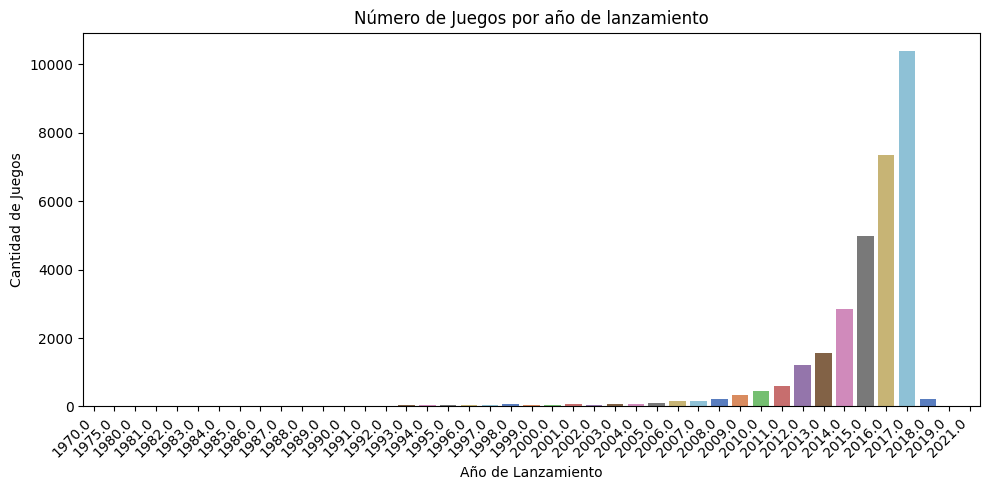

In [111]:


df_games_copy['release_date'] = pd.to_datetime(df_games_copy['release_date'], errors='coerce')

# 1. Contamos la frecuencia de cada año sin considerar N/A
count_year = df_games_copy['release_date'].dt.year.value_counts().sort_index()

# 3. Ordenar: Primero los años, luego 'Dato no disponible' al final
count_year = count_year.sort_index(key=lambda x: pd.to_numeric(x, errors='coerce').fillna(float('inf')))

# 4. Crear la gráfica de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=count_year.index, y=count_year.values, hue=count_year.index, legend=False, palette='muted')

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.title('Número de Juegos por año de lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*Para el posterior entrenamiento de nuestro modelo de machine learning, necesitamos utilizar un periodo más representativo de mayor cantidad de datos por año, ya que como apreciamos en las estadísticas y en la gráfica, un porcentaje mayoritario de lanzamientos de juegos fueron realizados en décadas reciente. En la siguiente gráfica nos centraremos en el periodo que parte en el año 2010.*

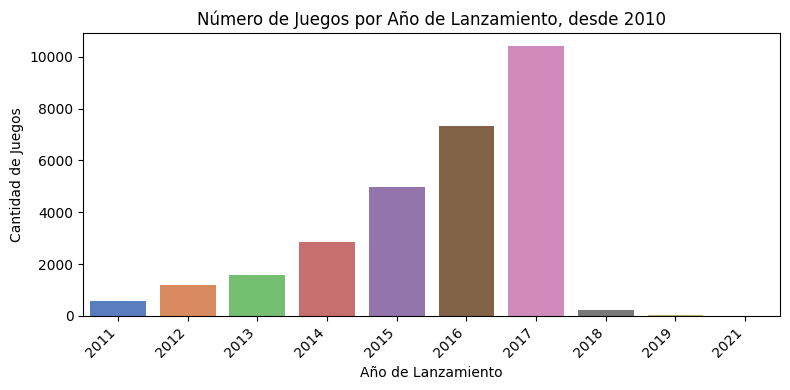

In [113]:

df_games_copy['release_date'] = pd.to_datetime(df_games_copy['release_date'], errors='coerce')

# Se cuenta la frecuencia de cada año mayor a 2010, excluyendo NaT
count_year = df_games_copy[df_games_copy['release_date'].notna() & (df_games_copy['release_date'].dt.year > 2010)]['release_date'].dt.year.value_counts().sort_index()

# Crea el gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(x=count_year.index, y=count_year.values, hue=count_year.index, legend=False, palette='muted')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.title('Número de Juegos por Año de Lanzamiento, desde 2010')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas para mayor claridad
plt.tight_layout()  # Ajustar distribución

# Mostrar la gráfica
plt.show()

**Análisis columna Publisher**

In [114]:
# Principales editores de juegos (publisher).
df_games_copy['publisher'].value_counts().head(10)

publisher
NA                        988
Dovetail Games  Trains    418
Ubisoft                   402
Degica                    340
Paradox Interactive       302
SEGA                      287
Dovetail Games  Flight    257
Big Fish Games            232
Activision                230
Dovetail Games            217
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12940\3742567259.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_counts[:10], y=genres_counts.index[:10], palette= 'muted')


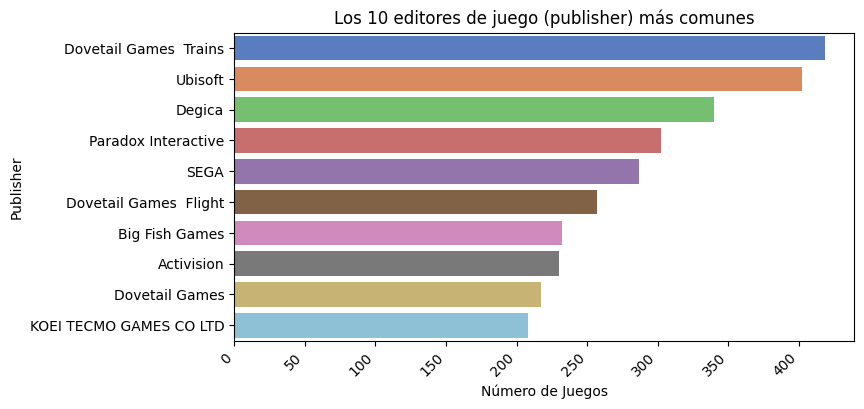

In [115]:
# Grafica los 10 editores de juego (publisher) más comunes, sin contar los que no están etiquetados
publisher_counts = genres_counts = df_games_copy[~df_games_copy['publisher'].isin(['NA', 'N/A', ''])]['publisher'].value_counts()

# Voy a crear un gráfico de barras para 'df_games' 
plt.figure(figsize=(8, 4))  # Establece el tamaño del gráfico
sns.barplot(x=genres_counts[:10], y=genres_counts.index[:10], palette= 'muted')

# etiquetamos
plt.xlabel("Número de Juegos")
plt.ylabel("Publisher")
plt.title("Los 10 editores de juego (publisher) más comunes")
plt.xticks(rotation=45, ha='right')
plt.show()

**Análisis Columna género de juego**

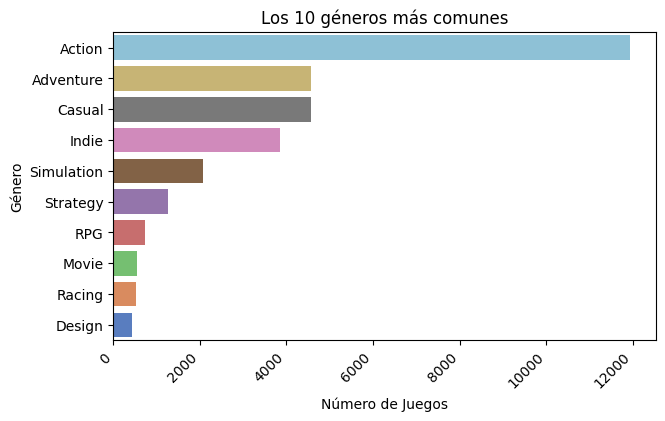

In [117]:
# Graficamos los géneros de juegos más repetidos sin contar los que no están etiquetados
genres_counts = df_games_copy[~df_games_copy['genres'].isin(['NA', 'N/A', ''])]['genres'].value_counts()

# Graficamos
plt.figure(figsize=(7, 4)) 
sns.barplot(x=genres_counts[:10], y=genres_counts.index[:10],hue=genres_counts[:10], legend=False, palette= 'muted')
plt.xlabel("Número de Juegos")
plt.ylabel("Género")
plt.title("Los 10 géneros más comunes")
plt.xticks(rotation=45, ha='right')
plt.show()

*Como podmeos ver en la gráfica, el géreo de acción se repite 12.000 veces en la plataforma, que quiere decir que 12000 juegos pertenecen a esta categoría.*

**Análisis columna 'developer'**

In [118]:
df_games_copy['developer'].value_counts().head(10)

developer
Ubisoft  San Francisco        1330
SmiteWorks USA LLC             894
Dovetail Games                 265
KOEI TECMO GAMES CO LTD        254
Paradox Development Studio     164
Capcom                         139
Ronimo Games                   136
NV Games                       107
Musopia                        105
Choice of Games                105
Name: count, dtype: int64

*Ubisoft San Francisco es por lejos el desarrollador más prolífico de nuestra base de datos, desarrollando más de 1330 juegos. El segundo y tercer lugar lo componen SmiteWorks USA LLC y  Dovetail Games, con 894 y 265 juegos desarrollados para STEAM, según nuestra base de datos.*

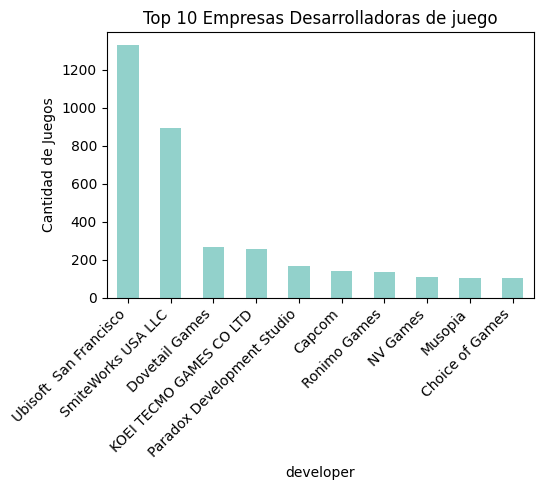

In [127]:
# Contar la cantidad de juegos por developer
conteo_developer = df_games_copy['developer'].value_counts()

# Crear una figura con dos subplots uno al lado del otro
plt.figure(figsize=(10, 5))

# Segundo subplot para los developers
plt.subplot(1, 2, 2)
conteo_developer[:10].plot(kind='bar', color='#92d1cb')
plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Empresas Desarrolladoras de juego')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Análisis Columna 'Price'**

*Calculamos los outliers para la columna 'price':*

In [122]:
df_games_copy['price'].describe()

count    31660.000000
mean         8.135227
std         14.835255
min          0.000000
25%          1.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

In [123]:
df_games_copy['price'].value_counts()

price
4.99      4285
9.99      3843
2.99      3438
0.00      3215
0.99      2604
          ... 
6.66         1
189.00       1
1.50         1
1.95         1
124.99       1
Name: count, Length: 144, dtype: int64

*El precio más común de nuestro conjunto de datos es el 4.99 dólares, que está asociado a 4285 juegos. El precio máximo es de 995 dólares y el mínimo corresponde a 0, que son los juegos gratuitos existentes en la plataforma.*

*En la siguiente gráfica, se muestra el top 10 de juegos más caros que encontramos en la base de datos.*

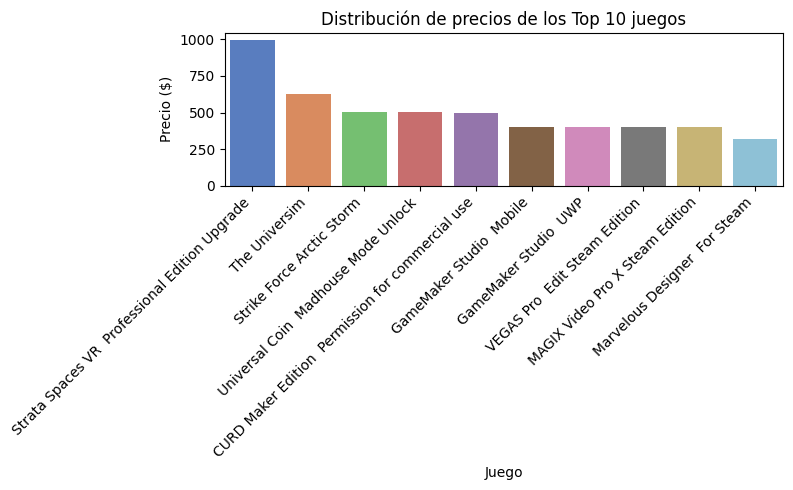

In [128]:
# Obtener los Top 10 juegos con los precios más altos o más frecuentes
Top_10 = df_games_copy[['app_name', 'price']].drop_duplicates().sort_values(by='price', ascending=False).head(10)

# Crear la figura de la gráfica
plt.figure(figsize=(8, 5))

# Usar barplot para mostrar los precios de los Top 10 juegos
sns.barplot(data=Top_10, x='app_name', y='price', hue='app_name', legend=False, palette='muted')

# Ajustar etiquetas y título
plt.xlabel('Juego')
plt.ylabel('Precio ($)')
plt.title('Distribución de precios de los Top 10 juegos')

# Se rotan etiquetas del eje X para mayor claridad
plt.xticks(rotation=45, ha='right')

# Ajustar distribución del layout y mostrar la gráfica
plt.tight_layout()
plt.show()

Como se aprecia, la mayor parte de los juegos tiene un precio menos a 100 dólares. Calculamos cuántos son los valores extremos de nuestro conjunto de datos.

In [129]:
df_games_copy['price'] = pd.to_numeric(df_games_copy['price'], errors='coerce')

# Definimos la función para calcular outliers usando IQR
def calcula_outliers_IQR(data, carac, distancia=3):

    ''' Cálculo del outliers usando  método IQR, datos de entrada
    Dataframe, columna a evaluar y distancia, valor opcional, que se ajusta por defecto en 3.'''

    Q1 = data[carac].quantile(0.25)
    Q3 = data[carac].quantile(0.75)
    IQR = Q3 - Q1

    # Límites inferior y superior
    limite_inf = Q1 - (IQR * distancia)
    limite_sup = Q3 + (IQR * distancia)

    # Detectar outliers
    outliers = (data[carac] < limite_inf) | (data[carac] > limite_sup)
    return outliers

# Calcula los outliers para la columna 'price'
outliers = calcula_outliers_IQR(df_games_copy, 'price')

# Ordena los resultados
outliers_price_sorted = df_games_copy.loc[outliers].sort_values(by='price', ascending=False)

# Mostrar los resultados
outliers_price_sorted

,publisher,genres,app_name,release_date,tags,price,id,developer
12088,Strata Mixed Reality Inc,Animation,Strata Spaces VR Professional Edition Upgrade,2017-01-01,Design Illustration Animation Modeling,995.00,719000.0,Strata Mixed Reality Inc
19742,Crytivo,Indie,The Universim,2017-01-01,Early Access God Game Simulation Strategy Sand...,624.74,352720.0,Crytivo
21427,West Forest Games,Action,Strike Force Arctic Storm,2016-01-01,Indie Action,501.87,527520.0,West Forest Games
12717,CAPCOM Co Ltd,Action,Universal Coin Madhouse Mode Unlock,2017-01-01,Action Adventure Gore Violent,501.87,530599.0,CAPCOM Co Ltd
14304,RUHRSOURCE GmbH,Animation,CURD Maker Edition Permission for commercial use,2017-01-01,Utilities Design Illustration Animation Mode...,499.99,691560.0,RUHRSOURCE GmbH
...,...,...,...,...,...,...,...,...
21704,New Bridge Games,Racing,Redout Enhanced Edition,2016-01-01,Racing Futuristic FastPaced Indie Great Soundt...,34.99,517710.0,New Bridge Games
21858,Aerosoft GmbH,Simulation,Fernbus Simulator,2016-01-01,Simulation Driving Realistic Singleplayer Open...,34.99,427100.0,TMLStudios
28448,Uber Entertainment,Strategy,Planetary Annihilation Digital Deluxe Addon,2014-01-01,Strategy RTS,34.99,321580.0,Uber Entertainment
22393,Bohemia Interactive,Action,Arma Apex,2016-01-01,Simulation Action Multiplayer Military Open Wo...,34.99,395180.0,Bohemia Interactive


*Graficamos un histograma que nos muestra la frecuencia de precios extremos en el dataframe*

(25.0, 200.0)

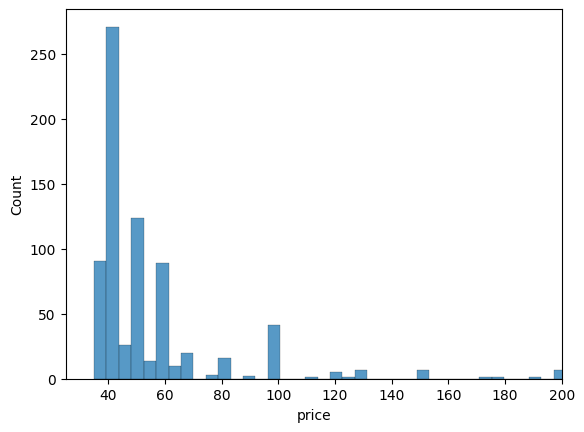

In [94]:
sns.histplot(df_games_copy.loc[outliers, 'price'])
plt.xlim(25,200)

In [95]:
#Exportamos df_games_copy, ya que sufrió modificaciones importantes.

df_games_copy.to_parquet('Games_final.parquet', index= False)